# Quark fields

Quark fields differ from ordinary fermion fields in that they carry an additional color index, corresponding to their transformation under the $\mathrm{SU}(3)$ color gauge group. 

Unlike colorless fermions such as leptons, quark fields have three color components. 

As shown below, the library explicitly supports this color index, enabling correct representation of QCD interactions.

In [1]:
import giancarlo as gc

Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
e = gc.Symbol('e')

u, ubar = gc.QuarkField('u')
d, dbar = gc.QuarkField('d')
s, sbar = gc.QuarkField('s')
c, cbar = gc.QuarkField('c')

u('x', 's', 'c')

u(x, s, c)

After the application of Wick's theorem, quark propagators carry also color indices

In [2]:
(u('x', 's_a', 'c_a') * ubar('y', 's_b', 'c_b')).wick()

( +S_{u}(x, y)(s_a, s_b)(c_a, c_b) )

In [3]:
def P(x):
    sa, sb = gc.default.var(), gc.default.var()
    ca = gc.default.var()
    return ubar(x, sa, ca) * gc.DiracGamma('5', sa, sb) * u(x, sb, ca)

corr = (P('x') * P('y')).wick()
corr

( +\gamma_{5}(x_{1}, x_{2})\,S_{u}(x, x)(x_{2}, x_{1})(x_{3}, x_{3})\,\gamma_{5}(x_{4}, x_{5})\,S_{u}(y, y)(x_{5}, x_{4})(x_{6}, x_{6})-\,\gamma_{5}(x_{1}, x_{2})\,S_{u}(x, y)(x_{2}, x_{4})(x_{3}, x_{6})\,\gamma_{5}(x_{4}, x_{5})\,S_{u}(y, x)(x_{5}, x_{1})(x_{6}, x_{3}) )

In [4]:
corr.contract('spin')

( +\mathrm{Tr}_\mathrm{spin} \big[\gamma_{5}\,S_{u}(x, x)(x_{3}, x_{3}) \big]\,\mathrm{Tr}_\mathrm{spin} \big[\gamma_{5}\,S_{u}(y, y)(x_{6}, x_{6}) \big]-\,\mathrm{Tr}_\mathrm{spin} \big[\gamma_{5}\,S_{u}(x, y)(x_{3}, x_{6})\,\gamma_{5}\,S_{u}(y, x)(x_{6}, x_{3}) \big] )

At the moment a double application of `contract` is challenging and depending on the order it may or may not work.

If the program does not manage to connect the indices of the indicated type it returns an error.
In the example below the opposite combination

```python
corr.contract('color').contract('spin')
```

would return an error.

In [5]:
corr.contract('spin').contract('color')

( +\mathrm{Tr}_\mathrm{color} \big[\mathrm{Tr}_\mathrm{spin} \big[\gamma_{5}\,S_{u}(x, x) \big] \big]\,\mathrm{Tr}_\mathrm{color} \big[\mathrm{Tr}_\mathrm{spin} \big[\gamma_{5}\,S_{u}(y, y) \big] \big]-\,\mathrm{Tr}_\mathrm{color} \big[\mathrm{Tr}_\mathrm{spin} \big[\gamma_{5}\,S_{u}(x, y)\,\gamma_{5}\,S_{u}(y, x) \big] \big] )

Repeating the same exercise we did for the EM current and the HVP would be pointless here. 

Instead we focus on new non-trivial operators that leverage the color structure, four-quark operators that tyipically appears in Effective Field Theories and are relevant in several phenomonological studies. 

# Four quark operators

In the weak effective field theory, four-quark operators encode short-distance interactions after integrating out the heavy electroweak degrees of freedom. Among these, the **current--current operators** originate from tree-level $W$ exchange and provide the basic building blocks for nonleptonic weak transitions involving multiple quark flavors.

A representative set of current--current operators with distinct quark flavors is

$$
Q_1 = (\bar{s}_a \gamma^\mu P_L u_b)\,(\bar{c}_b \gamma_\mu P_L d_a), \qquad
Q_2 = (\bar{s}_a \gamma^\mu P_L u_a)\,(\bar{c}_b \gamma_\mu P_L d_b),
$$

where $a,b$ are color indices and $P_L = \tfrac{1}{2}(1-\gamma_5)$.  
The two operators differ only by their color structure, which leads to different renormalization-group evolution and distinct hadronic matrix elements in physical amplitudes.

In [6]:
def Q(x, i):
    def bilin(fbar, f, c1, c2):
        sa, sb = gc.default.var(), gc.default.var()
        return fbar(x, sa, c1) * gc.DiracGamma('L', sa, sb) * f(x, sb, c2)
    ca, cb = gc.default.var(), gc.default.var()
    if i==1:
        return bilin(sbar, u, ca, cb) * bilin(cbar, d, cb, ca)
    elif i==2:
        return bilin(sbar, u, ca, ca) * bilin(cbar, d, cb, cb)

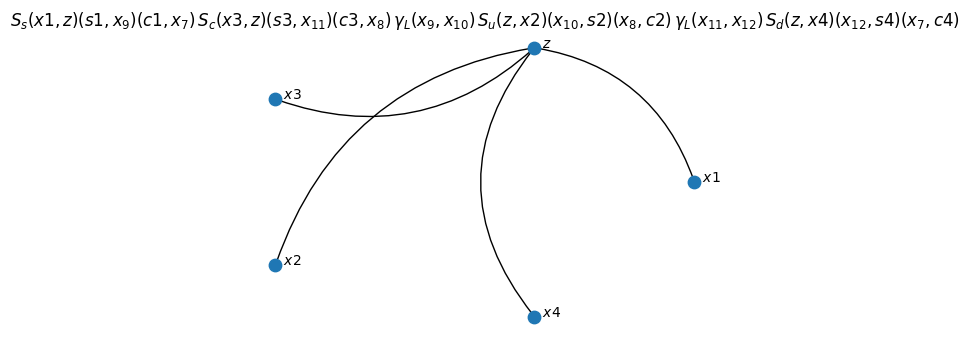

In [7]:
ext = s('x1','s1','c1') * ubar('x2','s2','c2') * c('x3','s3','c3') * dbar('x4','s4','c4')
(ext * Q('z', 1)).wick().draw()

In [8]:
(ext * Q('z', 1)).wick().contract('spin')

( +\big[S_{s}(x1, z)(c1, x_{13})\,\gamma_{L}\,S_{u}(z, x2)(x_{14}, c2) \big](s1,s2)\,\big[S_{c}(x3, z)(c3, x_{14})\,\gamma_{L}\,S_{d}(z, x4)(x_{13}, c4) \big](s3,s4) )

In [9]:
(ext * Q('z', 2)).wick().contract('spin')

( +\big[S_{s}(x1, z)(c1, x_{19})\,\gamma_{L}\,S_{u}(z, x2)(x_{19}, c2) \big](s1,s2)\,\big[S_{c}(x3, z)(c3, x_{20})\,\gamma_{L}\,S_{d}(z, x4)(x_{20}, c4) \big](s3,s4) )